In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## Data pairs:
# radius_NR0_rand2_correlated.txt  AND  full_NR0_rand2_correlated.txt
# radius_NR0_rand1_correlated.txt  AND  full_NR0_rand1_correlated.txt
# radius_NR0_rand3_correlated.txt  AND  full_NR0_rand3_correlated.txt
# radius_NR0_rand2_uncorrelated.txt  AND  full_NR0_rand2_uncorrelated.txt
# radius_NR0_rand1_uncorrelated.txt  AND  full_NR0_rand1_uncorrelated.txt
# radius_NR0_rand3_uncorrelated.txt  AND  full_NR0_rand3_uncorrelated.txt

h = open('radius_NR0_rand3_uncorrelated.txt', 'r')

print h.readline()

R = int(h.readline())
M = int(h.readline())
N = int(h.readline())
R = 5
print M*N

dn2 = np.zeros([M*N, R])

for i in range(0, R):
    for j in range(0, M*N):
        k = h.readline()
        dn2[j,i] = float(k)   
h.close()
g = open('full_NR0_rand3_uncorrelated.txt', 'r')

print g.readline()

M = int(g.readline())
N = int(g.readline())
print M*N
dn1 = np.zeros([M*N,1])
line = g.readline()
line =line.split()
for i in range(0,M*N):
    dn1[i] = float(line[i])
#        dn1[j,i] = float(k)   
g.close()

Northridge, 0 stations, max_R = 55

33366
Northridge, 0 stations 

33366


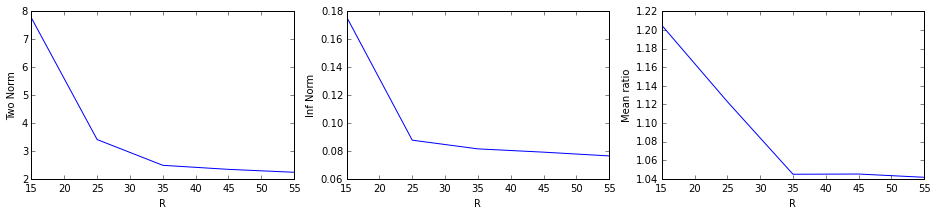

In [36]:
two_norm = np.zeros(R)
inf_norm = np.zeros(R)
mean_ratio = np.zeros(R)
x = [15, 25, 35, 45, 55]
for k in range(0,R):
    two_norm[k] = np.linalg.norm(abs(dn2[:,k] - dn1[:,0]),2)
    inf_norm[k] = np.linalg.norm(abs(dn2[:,k] - dn1[:,0]),np.inf)
    mean_ratio[k] = np.mean(abs(dn1[:,0]/dn2[:,k]))
    
#     plt.figure(figsize = (4,2))
#     plt.plot(dn1[:,0]/dn2[:,k])
plt.figure(figsize = (16,3))
plt.subplot(1,3,1)
plt.plot(x, two_norm)
plt.xlabel('R')
plt.ylabel('Two Norm')
plt.subplot(1,3,2)
plt.plot(x, inf_norm)
plt.xlabel('R')
plt.ylabel('Inf Norm')
plt.subplot(1,3,3)
plt.plot(x, mean_ratio)
plt.xlabel('R')
plt.ylabel('Mean ratio')

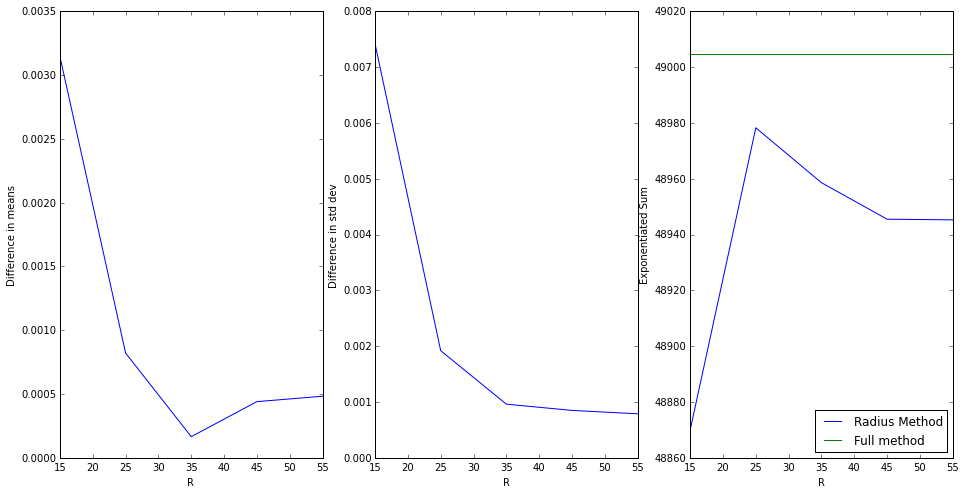

In [37]:
mean_diff = np.zeros(R)
std_diff = np.zeros(R)
sums = np.zeros(R)
x = [15, 25, 35, 45, 55]
for i in range(0, R):
    mean_diff[i] = np.mean(dn2[:,i]) - np.mean(dn1[:,0])
    std_diff[i] = np.std(dn2[:,i]) - np.std(dn1[:,0])
    sums[i] = sum(np.exp(dn2[:,i]))
    
plt.figure(figsize = (16,8))
plt.subplot(1,3,1)
plt.plot(x, abs(mean_diff))
plt.xlabel('R')
plt.ylabel('Difference in means')
plt.subplot(1,3,2)
plt.plot(x, abs(std_diff))
plt.xlabel('R')
plt.ylabel('Difference in std dev')
plt.subplot(1,3,3)
plt.hold(True)
plt.plot(x, sums, label = 'Radius Method')
plt.plot(x, np.ones(5)*sum(np.exp(dn1[:,0])), label = 'Full method')
plt.legend(loc = 4)
plt.xlabel('R')
plt.ylabel('Exponentiated Sum')

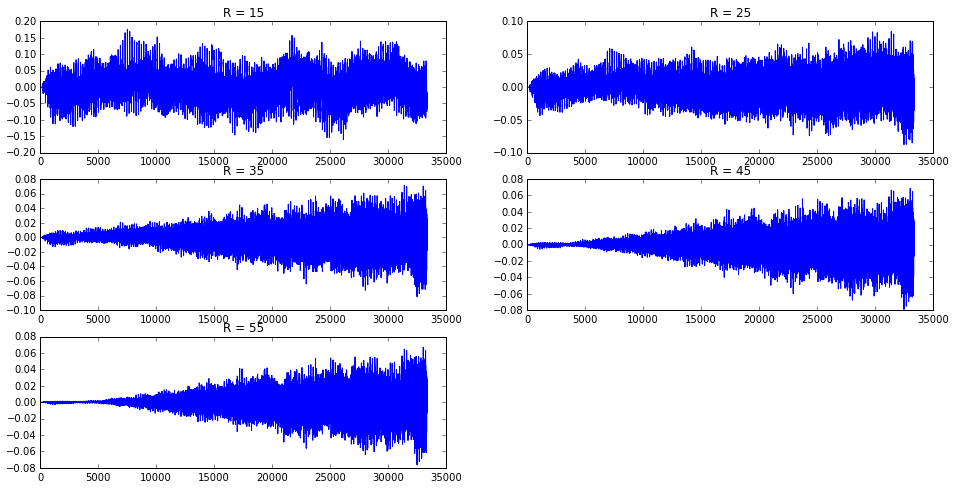

In [38]:
fig = plt.figure(figsize  = (16,8))
                 
for i in range(0,5):
    plt.subplot(3,2,i+1)
    plt.plot(dn2[:,i] - dn1[:,0])
    plt.title('R = %i' % x[i])


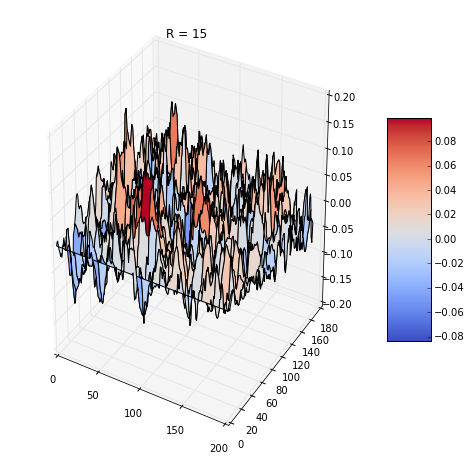

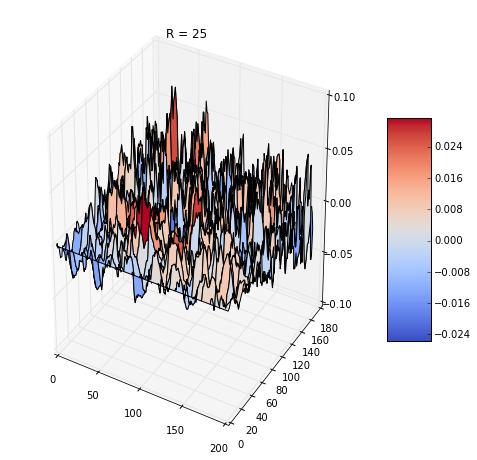

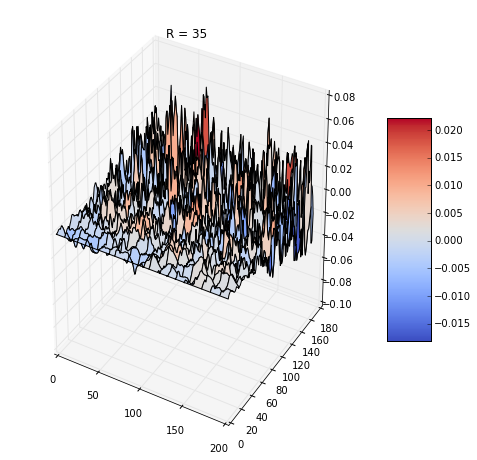

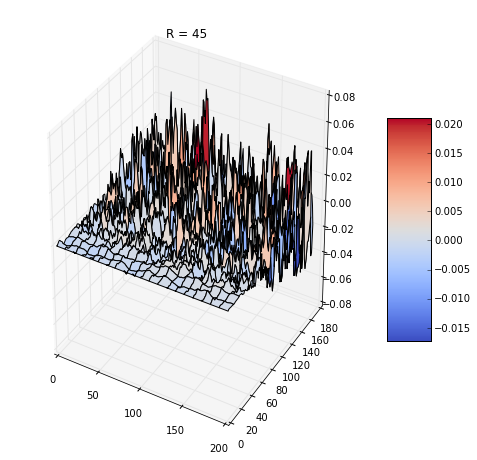

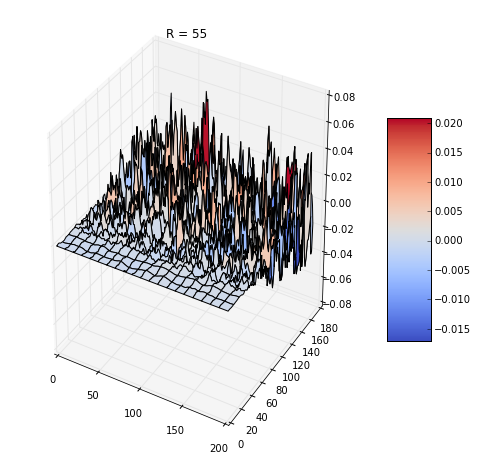

In [39]:
for i in range(0,5):
    fig = plt.figure(figsize = (8,8))
    ax = fig.gca(projection='3d')
    x1 = np.arange(0, N, 1)
    y1 = np.arange(0, M, 1)
    x1,y1 = np.meshgrid(x1,y1)
    surf = ax.plot_surface(x1,y1,np.reshape(dn2[:,i],[M,N]) - np.reshape(dn1[:,0], [M,N]), cmap = cm.coolwarm)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title('R = %i' % x[i])
    
# fig = plt.figure(figsize = (8,8))
# ax = fig.gca(projection='3d')
# x1 = np.arange(0, N, 1)
# y1 = np.arange(0, M, 1)
# x1,y1 = np.meshgrid(x1,y1)
# surf = ax.plot_surface(x1,y1,np.reshape(dn1[:,0], [M,N]), cmap = cm.coolwarm)
# fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.title('Full method')

In [28]:
# for i in range(0,R-1):
#     sig = np.std(dn2[:,i+1])
#     sig1 = np.std(dn2[:,i])
    
#     K = np.exp((-1/(2*np.power(sig,2)))*np.power(np.linalg.norm(dn2[:,i+1] - dn2[:,i],2),2))
#     K1 = np.exp((-1/(2*np.power(sig1,2)))*np.power(np.linalg.norm(dn2[:,i+1] - dn2[:,i],2),2))
#     print K, K1
    
# for i in range(0,R-1):
#     sig = np.std(dn2[:,R-1])
#     K = np.exp((-1/(2*np.power(sig,2)))*np.power(np.linalg.norm(dn2[:,R-1] - dn2[:,i],2),2))
#     print 1 - K

In [29]:
# for i in range(0,R-1):
    
#     S = (dn2[:,i]*np.mat(dn2[:,i+1]).T)/(np.linalg.norm(dn2[:,i+1],2)*np.linalg.norm(dn2[:,i],2))
#     print S
    
#for i in range(0,R-1):
    
#    S = (dn2[:,i]*np.mat(dn2[:,R-1]).T)/(np.linalg.norm(dn2[:,R-1],2)*np.linalg.norm(dn2[:,i],2))
#    print S

In [30]:
# for i in range(0,5):
#     print sum(dn2[20000:,i])
